#imports

In [ ]:
import os
from os import listdir
import numpy as np
import cv2
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, LocallyConnected2D, MaxPooling2D, Flatten, Dense, Dropout, Activation , ZeroPadding2D
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json
from google.colab.patches import cv2_imshow  
import cv2
import glob
import pandas as pd
from tensorflow.keras.optimizers import RMSprop , Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import CSVLogger
import keras
from matplotlib import pyplot as plt



#model strcture

In [ ]:
baseline = Sequential()
baseline.add(Convolution2D(32, (7, 7), activation='relu', input_shape=(299, 299, 3)))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(64, (6, 6), activation='relu'))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(128, (5, 5), activation='relu'))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(128, (4, 4), activation='relu'))
baseline.add(Flatten())
baseline.add(Dense(4608, activation='relu'))
baseline.add(Dense(2048, activation='relu'))
baseline.add(Dropout(rate=0.5))
baseline.add(Dense(25, activation='softmax'))

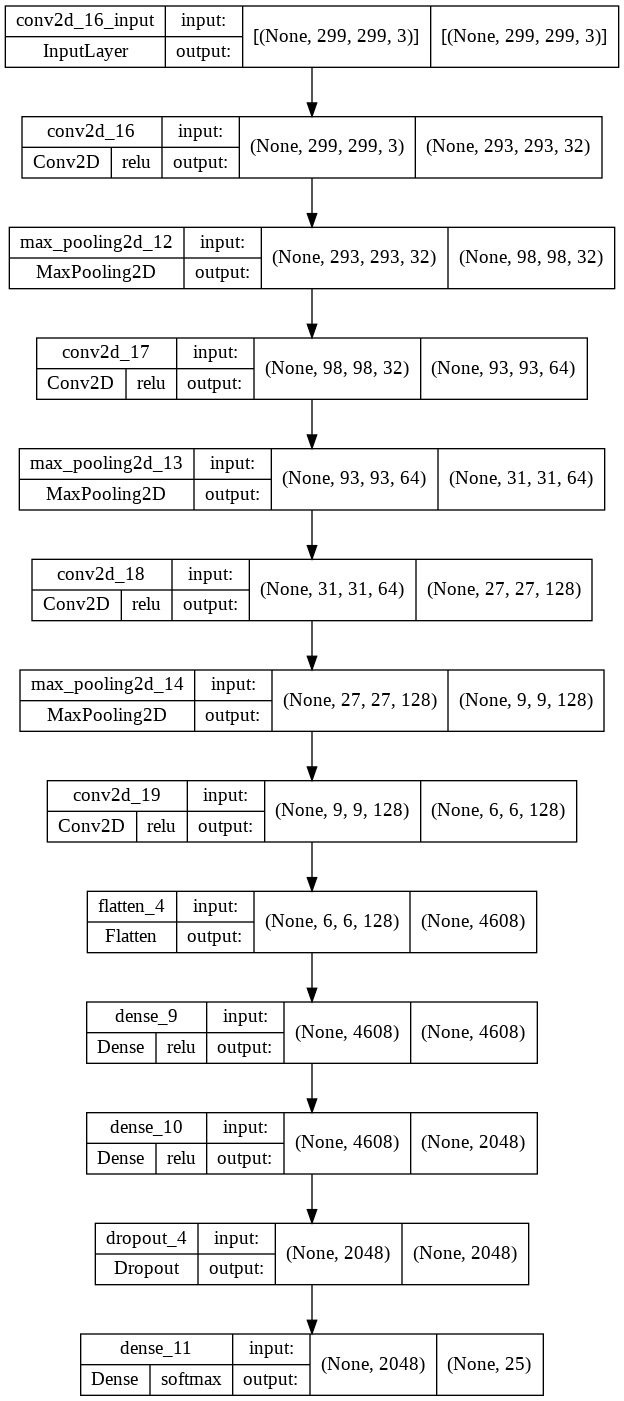

In [ ]:
plot_model(baseline, show_shapes=True,
    
    show_layer_activations=True)

In [ ]:
baseline.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 293, 293, 32)      4736      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 98, 98, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 93, 93, 64)        73792     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 27, 27, 128)       204928    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 9, 9, 128)       

#data gen

In [ ]:
#creating data generator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


valdgen = ImageDataGenerator(
        rotation_range=40,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



In [ ]:
#classes' names
path = '/content/drive/MyDrive/fbdpface/myfinaldata299/train'
dir_list = os.listdir(path)
dir_list.sort()
dir_list

['Abdulhadi',
 'Abdurrahman',
 'Ahmed',
 'Alhamza',
 'Ameer',
 'Baraa',
 'Basak',
 'Bilal',
 'CR7',
 'Eyad',
 'Hamdo',
 'Hamo',
 'Karim',
 'Kurnasan',
 'Mahasin',
 'Melike',
 'Nacho',
 'Nour',
 'Obada',
 'Oubaid',
 'Ram',
 'Safiye',
 'Sarah',
 'Vini',
 'Zeynep_bastik']

In [ ]:
#fitting the traing data

trainingdata = r'/content/drive/MyDrive/fbdpface/myfinaldata299/train'

dir_list = os.listdir(trainingdata)
dir_list.sort()


trd = datagen.flow_from_directory( trainingdata, target_size= (299,299) , 
batch_size=15 , class_mode="categorical" ,
 classes= dir_list)


Found 497 images belonging to 25 classes.


In [ ]:
valdata = r'/content/drive/MyDrive/fbdpface/myfinaldata299/val'

dir_list = os.listdir(valdata)
dir_list.sort()


vdt = valdgen.flow_from_directory( valdata, target_size= (299,299) , 
batch_size=15 , class_mode="categorical" ,
 classes= dir_list)


Found 225 images belonging to 25 classes.


#helping func

In [ ]:

def plotfunction(epochesrange):
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs_range = range(epochesrange)

  fig = plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="train accuracy")
  plt.plot(epochs_range, val_acc, label="validataion accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="train loss")
  plt.plot(epochs_range, val_loss, label="validataion loss")
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")

  fig.tight_layout()
  plt.show()


#1.

In [ ]:
baseline = Sequential()
baseline.add(Convolution2D(32, (7, 7), activation='relu', input_shape=(299, 299, 3)))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(64, (6, 6), activation='relu'))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(128, (5, 5), activation='relu'))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(128, (4, 4), activation='relu'))
baseline.add(Flatten())
baseline.add(Dense(4608, activation='relu'))
baseline.add(Dense(2048, activation='relu'))
baseline.add(Dropout(rate=0.5))
baseline.add(Dense(25, activation='softmax'))

#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/baseline/1.h5"
csvl = r'/content/drive/MyDrive/baseline/1.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]

baseline.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.0001))


history = baseline.fit(

trd,
epochs = 500,
validation_data= vdt,
callbacks = callbacks,
)
baseline.save(cp)

Epoch 1/500
34/34 [==============================] - ETA: 0s - loss: 7.3416 - accuracy: 0.0463
Epoch 1: val_loss improved from inf to 3.18407, saving model to /content/drive/MyDrive/baseline/1.h5
34/34 [==============================] - 465s 13s/step - loss: 7.3416 - accuracy: 0.0463 - val_loss: 3.1841 - val_accuracy: 0.0533
Epoch 2/500
34/34 [==============================] - ETA: 0s - loss: 3.1577 - accuracy: 0.1046
Epoch 2: val_loss improved from 3.18407 to 3.06699, saving model to /content/drive/MyDrive/baseline/1.h5
34/34 [==============================] - 21s 631ms/step - loss: 3.1577 - accuracy: 0.1046 - val_loss: 3.0670 - val_accuracy: 0.0933
Epoch 3/500
34/34 [==============================] - ETA: 0s - loss: 2.8504 - accuracy: 0.1972
Epoch 3: val_loss improved from 3.06699 to 2.89663, saving model to /content/drive/MyDrive/baseline/1.h5
34/34 [==============================] - 21s 626ms/step - loss: 2.8504 - accuracy: 0.1972 - val_loss: 2.8966 - val_accuracy: 0.1556
Epoch 4/5

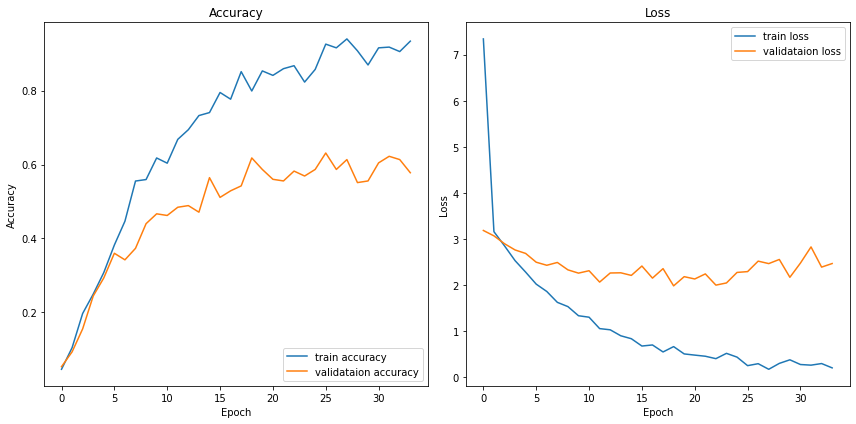

In [ ]:
plotfunction(34)

#2.


In [ ]:
baseline = Sequential()
baseline.add(Convolution2D(32, (7, 7), activation='relu', input_shape=(299, 299, 3)))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(64, (6, 6), activation='relu'))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(128, (5, 5), activation='relu'))
baseline.add(MaxPooling2D(pool_size=3, strides=3, padding='same'))
baseline.add(Convolution2D(128, (4, 4), activation='relu'))
baseline.add(Flatten())
baseline.add(Dense(4608, activation='relu'))
baseline.add(Dropout(rate=0.5))
baseline.add(Dense(25, activation='softmax'))

#callbacks for early stopping and saving the best model

cp = r"/content/drive/MyDrive/baseline/2.h5"
csvl = r'/content/drive/MyDrive/baseline/2.log'



checkpoint = ModelCheckpoint(cp ,
                             monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 15 , restore_best_weights = True , 
                           verbose = 1)



csv_logger = CSVLogger(csvl, separator=',', append=False)



callbacks = [earlystop  ,checkpoint, csv_logger]

baseline.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] , 
                 optimizer =Adam(learning_rate = 0.00005))


history = baseline.fit(

trd,
epochs = 500,
validation_data= vdt,
callbacks = callbacks,
)
baseline.save(cp)

Epoch 1/500
34/34 [==============================] - ETA: 0s - loss: 9.3355 - accuracy: 0.0463
Epoch 1: val_loss improved from inf to 3.16455, saving model to /content/drive/MyDrive/baseline/2.h5
34/34 [==============================] - 18s 522ms/step - loss: 9.3355 - accuracy: 0.0463 - val_loss: 3.1645 - val_accuracy: 0.0844
Epoch 2/500
34/34 [==============================] - ETA: 0s - loss: 3.0598 - accuracy: 0.1227
Epoch 2: val_loss improved from 3.16455 to 3.08544, saving model to /content/drive/MyDrive/baseline/2.h5
34/34 [==============================] - 19s 566ms/step - loss: 3.0598 - accuracy: 0.1227 - val_loss: 3.0854 - val_accuracy: 0.1333
Epoch 3/500
34/34 [==============================] - ETA: 0s - loss: 2.8775 - accuracy: 0.1871
Epoch 3: val_loss improved from 3.08544 to 3.04289, saving model to /content/drive/MyDrive/baseline/2.h5
34/34 [==============================] - 20s 591ms/step - loss: 2.8775 - accuracy: 0.1871 - val_loss: 3.0429 - val_accuracy: 0.1822
Epoch 4/

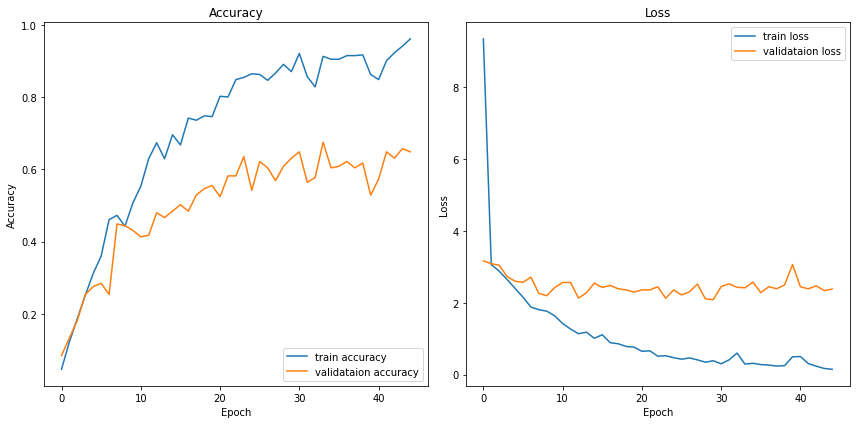

In [ ]:
plotfunction(45)

In [ ]:
from tensorflow.keras.utils import plot_model 

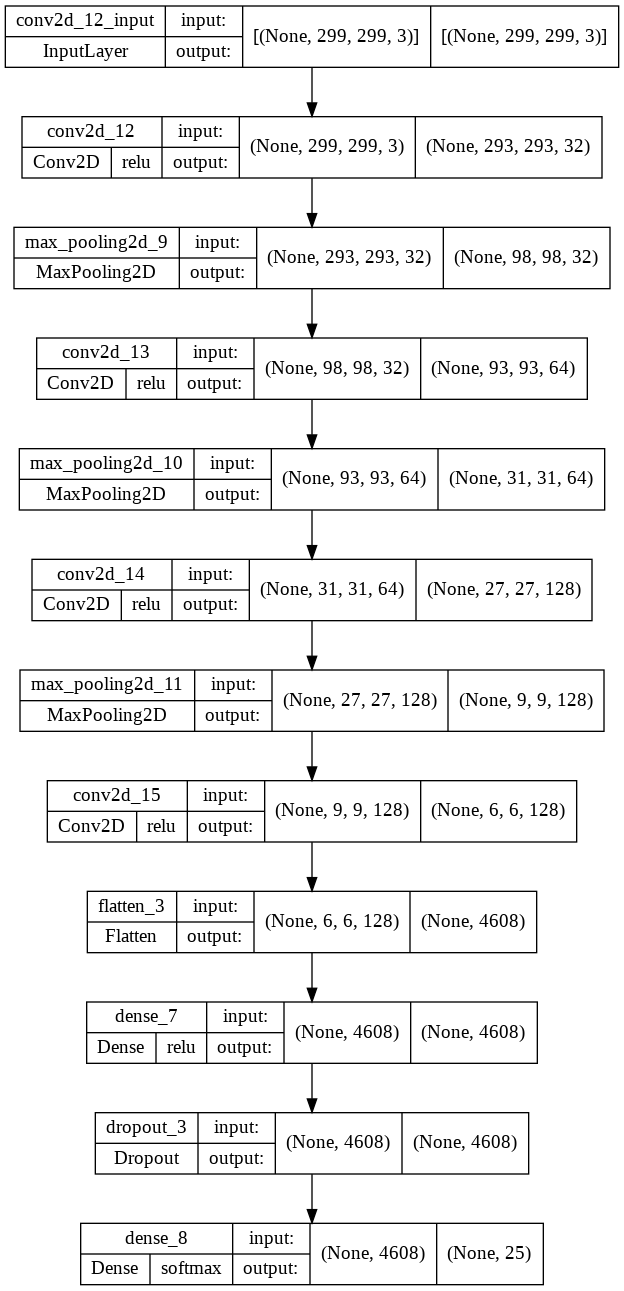